#### UCI: default of credit card clients Data Set
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [2]:
## ID: ID of each client
## LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
## SEX: Gender (1=male, 2=female)
## EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
## MARRIAGE: Marital status (1=married, 2=single, 3=others)
## AGE: Age in years
## PAY_0: Repayment status in September, 2005 
## (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,...8=payment delay for eight months, 9=payment delay for nine months and above)
## PAY_2: Repayment status in August, 2005 (scale same as above)
## PAY_3: Repayment status in July, 2005 (scale same as above)
## PAY_4: Repayment status in June, 2005 (scale same as above)
## PAY_5: Repayment status in May, 2005 (scale same as above)
## PAY_6: Repayment status in April, 2005 (scale same as above)
## BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
## BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
## BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
## BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
## BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
## BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
## PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
## PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
## PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
## PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
## PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
## PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
## default.payment.next.month: Default payment (1=yes, 0=no)

### importing essential packages

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC ## supprot vector Classifier
from sklearn.metrics import confusion_matrix ## cf in form of actual matrix
from sklearn.metrics import plot_confusion_matrix, classification_report ## ploting confusin matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale ## to scale and center
from sklearn.decomposition import PCA ## principle component perform to covert into 2d plot
from sklearn.utils import resample
%matplotlib inline
sns.set()

In [210]:
df = pd.read_excel("default of credit card clients.xls", header=1)

In [211]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [212]:
## ID column and index are same. so I am droping ID coiumn.

df.drop("ID", axis = 1, inplace = True)

In [213]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [214]:
## checking if I have any null values in any column to perform feature engineering.

df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Sex, Education and Marriage columns looklike they are categorical data and also given in the description!


In [71]:
df["SEX"].unique()

## looks perfect!!

array([2, 1], dtype=int64)

In [72]:
df["EDUCATION"].unique()

## Education = 0 means undefined. No such infromation is given.

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [215]:
df["MARRIAGE"].unique()

## Marriage = 0 also means undefined. 

array([1, 2, 3, 0], dtype=int64)

In [216]:
## let's check numbers of records having education and marriage = 0.

print(len(df[df["EDUCATION"] == 0]))
print(len(df[df["MARRIAGE"] == 0]))

14
54


In [217]:
## total len of data which has 0 in education and marriage column

missing_values = len(df[(df["EDUCATION"] == 0 ) | (df["MARRIAGE"] == 0)])

missing_values

68

In [219]:
## make new dataframe except those records

df_new = (df[(df["EDUCATION"] != 0 ) & (df["MARRIAGE"] != 0)])

In [220]:
df_new.shape

(29932, 24)

In [221]:
df_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [223]:
## renaming target column

df_new.rename(columns= {"default payment next month" : "Default"}, inplace = True)

In [224]:
df_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [226]:
## Counting the ratio 
df_new["Default"].value_counts()

## clearly states that it is unbalanced dataset
## we can downsample that by taking help from 

0    23301
1     6631
Name: Default, dtype: int64

In [118]:
## divide dataframe according to default and did not default value

default_0 = df_new[df_new["Default"] == 0]
default_1 = df_new[df_new["Default"] == 1]

## just take 1500 samples each

downsized_0 = resample(default_0, replace = False, n_samples = 1500, random_state = 42)
downsized_1 = resample(default_1, replace = False,  n_samples = 1500, random_state = 42)

## make a new data frame of new size

df_sampled = pd.concat([downsized_0, downsized_1])


# shuffle the data just to avoid overfitting
from sklearn.utils import shuffle

df_sampled = shuffle(df_sampled)

df_sampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
8833,90000,1,2,1,37,2,-1,-1,0,0,...,38144,39177,36687,6732,92113,1317,1598,1461,1354,0
28096,50000,2,2,1,39,1,2,2,2,0,...,28357,28984,30012,0,3500,0,1100,1500,1100,1
28366,20000,2,3,1,39,1,2,2,2,2,...,9752,9447,10290,1200,0,1700,0,1000,1500,1
18259,20000,1,2,1,61,3,4,3,2,2,...,16893,21318,20412,0,0,0,4726,0,0,1
24600,110000,1,2,1,38,2,2,2,2,0,...,69141,135478,71875,2500,2494,2477,2500,3003,3000,1


### Assigning or split Train and Test data to avoid overfitting

In [227]:
X = df_sampled.drop("Default", axis = 1)
y = df_sampled["Default"]

#### get_dummies method to convert categorical variables into indicator

In [124]:
X_ohe = pd.get_dummies(X, columns = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5"])

In [126]:
X_ohe

,LIMIT_BAL,AGE,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7
8833,90000,37,0,117793,93777,87401,38144,39177,36687,6732,...,0,0,0,1,0,0,0,0,0,0
28096,50000,39,0,27094,26365,29124,28357,28984,30012,0,...,0,0,0,1,0,0,0,0,0,0
28366,20000,39,0,8562,9478,8198,9752,9447,10290,1200,...,0,0,0,0,1,0,0,0,0,0
18259,20000,61,4,18618,18040,17471,16893,21318,20412,0,...,0,0,0,0,1,0,0,0,0,0
24600,110000,38,0,103202,69917,68917,69141,135478,71875,2500,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17824,50000,25,0,42238,43259,35307,23096,18970,19514,1807,...,0,0,0,1,0,0,0,0,0,0
29804,20000,45,0,18838,18243,18849,17724,17524,0,0,...,0,0,0,1,0,0,0,0,0,0
28008,240000,29,-2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9586,120000,29,0,118303,98232,150952,77639,79966,61248,3358,...,0,0,0,1,0,0,0,0,0,0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state = 42)

#### Here I am scaling train (all the features of X) between 0 and 1 in order to provide equal scaled data to ML model.

In [136]:
X_train = scale(X_train)
X_test = scale(X_test)

### Initializing model and making prediction on Test data

In [138]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [162]:
y_pred = clf.predict(X_test)

#### To know how well the ML classification model works, we plot cinfusion matrix and check True Nagetive and True Postive.

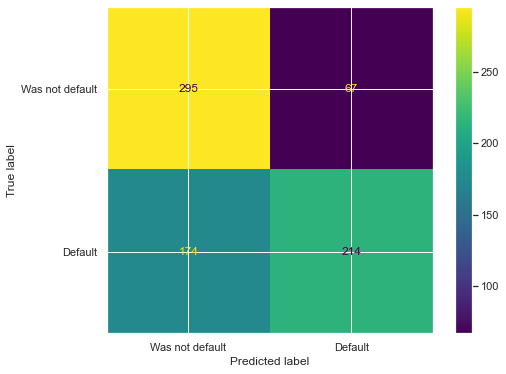

In [228]:
fig, ax = plt.subplots(figsize=(8,6))

plot_confusion_matrix(clf, X_test, y_test, display_labels= ["Was not default", "Default"], ax=ax)

plt.show()

In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[295,  67],
       [174, 214]], dtype=int64)

Out of 388 true "Default" payment, model predicted only 214 coreect ones! This could be better!


Out of 362 true "Not default" payment, model predicted 295 correct ones! For True nagetive model is performing well.

#### Checking F1 score and Recall score for the same

In [230]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

F1 = f1_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred)

score = pd.DataFrame(data={"F1 Score" : str(F1*100)+" %", "Recall" : str(Recall*100)+" %"}, index= [1])
score

## Not performing well

,F1 Score,Recall
1,67.4874401687955 %,55.154639175257735 %


In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       362
           1       0.76      0.55      0.64       388

    accuracy                           0.68       750
   macro avg       0.70      0.68      0.67       750
weighted avg       0.70      0.68      0.67       750



 SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations. Hence, this method is called Gridsearch.

In [251]:
param_grid = {'C': [0.1,10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [253]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = "accuracy")

In [255]:
optimal_params.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [256]:
print(optimal_params.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [257]:
## retrain the model 

In [267]:
optimal_pred = optimal_params.predict(X_test)

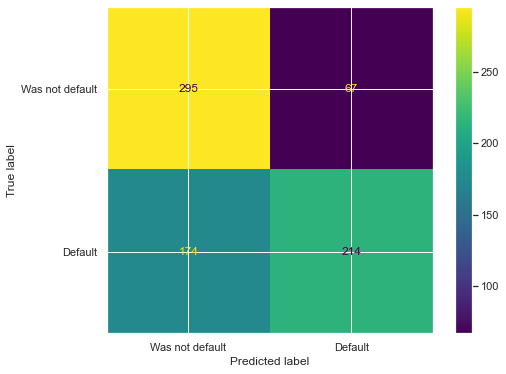

In [268]:
fig, ax = plt.subplots(figsize=(8,6))

plot_confusion_matrix(clf, X_test, y_test, display_labels= ["Was not default", "Default"], ax=ax)

plt.show()

In [269]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

F1 = f1_score(y_test, optimal_pred, average='macro')
Recall = recall_score(y_test, optimal_pred)

score = pd.DataFrame(data={"F1 Score" : str(F1*100)+" %", "Recall" : str(Recall*100)+" %"}, index= [1])
score


,F1 Score,Recall
1,66.69716804582039 %,54.63917525773196 %


In [270]:
print(classification_report(y_test, optimal_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       362
           1       0.75      0.55      0.63       388

    accuracy                           0.67       750
   macro avg       0.69      0.68      0.67       750
weighted avg       0.69      0.67      0.67       750

